# COGS 108 - Final Project - Paradise Lost

# Overview

Our team, MARCK, is working with datasets of weather (temperature, humidity, air pressure, months, major cities) and flights (passenger traffic and date).  Based on current knowledge, we assume that the most measures of successful trip include pleasant weather.  We know that these aspects of weather fluctuate over the year, with some seasons not being optimal for travel for certain cities.

# Names

- XXXXXXXXX
- XXXXXXXXX 
- XXXXXXXXX
- XXXXXXXXX
- XXXXXXXXX

# Group Members IDs

- XXXXXXXXX
- XXXXXXXXX
- XXXXXXXXX
- XXXXXXXXX
- XXXXXXXXX

# Research Question

To what extent does bad weather impact flight bookings? Specifically, we want to identify a potential threshold of some factor(s), such as temperature, humidity, natural disasters, etc. in common travel destinations that causes deceleration or negative growth of flights booked to that destination. We believe that by looking at flights booked over the course of 10 years to major American cities, namley Los Angeles, Seattle, Chicago, New York City and Orlando and by comparing them to changes in such as temperature, humidity, and air pressure, we can identify at what point of factors of weather may reliably make a significant impact on booked flights.

## Background and Prior Work

Vacation is fun -- when weather permits. Throughout the year, there are peak and off-peak time for traveling. People would comment: “ I don’t want to go to New York now because it is too cold” or “I don’t want to go to Seattle because it’s going to rain.” However, these places are still remaining as popular locations to travel. Hence, we are interested in learning more about what meteorological factors play into booking flights.

There are many reasons why people decide not to travel. Whether it is the fact the flights get canceled/delayed too often at that time of year or that their destination is not suited with the weather they desire. The Bureau of Transportation Statistics reports the reason why flights get canceled. It is important to understand the reason why flights cancel for a few reasons. We will be able to determine that the weather at the destination is not that great. This will be able to tell us whether there were fewer travelers to that destination using another dataset alongside the dataset with the one that has the information about the flight cancellations. Extreme Weather is defined

Business Insider’s “Why cold winter weather cancels roughly 60,000 flights a year in the US” also explores this idea from the context of what happens on the ground.  Although planes can physically fly well in cold weather, there is the issue of uneven runways or visibility issues.  Iced passenger airplanes take turns at defrosting stations, which can cause delays.  The combination of bad road conditions that have caused passengers to miss their flights and delays causing passengers to miss connecting flights lead to a domino effect of cancellations as airports do not find it beneficial to fly with few passengers.
	
The Federal Aviation Administration addressed several questions regarding weather delays. It noted that weather is the largest delay in the National Air System and that New York and San Francisco airports tend to have the most weather-related delays.  However, air traffic delays differ over the course of the year depending on the type of weather. During winter, surface winds and low ceiling and visibility are the main causes of weather delays, while in the summer the main causes are convective weather and low ceiling and visibility. It also explained that when flights encounter thunderstorms, aircrafts may have to divert to other airports, which causes large passenger delay and high costs.  It would be more desirable to predict the weather before a flight’s departure in order to determine if it should be cancelled or not for the airport.

References (include links):
- Causes of flight delays and cancellations with one cause is weather 

https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations

Describes 50% flight were delayed due to weather (Extreme weather and NAS weather)

- Cold weather leads to the cancellation of 60,000 Flights per year

https://www.businessinsider.com/flight-cancellation-cold-weather-storm-blizzard-closing-airports-2019-2

Cold weather can inhibit the plane from take-off when there ice on the plane or on the runway

- Weather is the main cause of flight delays

https://www.faa.gov/nextgen/programs/weather/faq/

Shows the different types of weather conditions and how many delays they cause in winter and summer

# Hypothesis


We hypothesized that as the weather gets more unfriendly, which is when the temperature highly increases and decreases, precipitation increases, or when the atmospheric pressure decreases, the booked flights will decrease accordingly. This is because an unfriendly weather would affect the schedule negatively. Unbearable high temperature and low temperature would decrease tourists’ will for visiting that location. Rainy days would reduce the available events and locations to visit.  Moreover, atmospheric pressure can lead to cloudiness, wind, and precipitation, when it’s low, which can decrease tourists’ willingness of visiting the location. In contrast, high pressure can bring calm weather, which is favorable when touring a city. Hence, the more the weather is friendly, the more the flights will be booked. 


# Dataset(s)


Dataset Name: Welcome Aboard : USA Airport Dataset EDA

Link to the dataset: https://www.kaggle.com/flashgordon/welcome-aboard-usa-airport-dataset-eda/data

Number of observations: 39,674,833

Description: This dataset contains over 3.6 million flights and information about their origin city/airport/population, destination city/airport/population, number of passengers, seats, and distance of flight. It also contains the flight dates but only the month and year.  It is restricted to only flights coming to and from cities in the United States. 


Dataset Name: 'Timeanddate.com' <b>This was created with  Beautiful Soup webscraping</b>

Link to the dataset: Timeanddate.com (Note: an example link from this website would be https://www.timeanddate.com/weather/usa/los-angeles/historic?month=9&year=2009, but we used information from over one thousand links) 

Number of observations: 2,240 

Description: This website has data on past temperature, humidity, and pressure for hundreds of cities around the world. We used BeautifulSoup to webscrape this website for this data and build a table of weather conditions for the average Temperature, Humidity, and Air Pressure each month (we had to retain weather conditions to average month data because the exact dates of flights was not listed in the previous dataset)

For the five citites of observation, Los Angeles, Seattle, Chicago, New York City, and Orlando, we used these two datasets to compare monthly weather conditions with their corresponding flight data in order to see what relationships exist between the available variabes.

# Setup

In [1]:
# Imports used for the project

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind
import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

Loading the airport data

In [7]:
df_airports = pd.read_csv("Airports.csv")

In [8]:
df_airports.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
0,MHK,AMW,"Manhattan, KS","Ames, IA",...,254,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",...,103,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",...,103,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",...,103,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",...,156,199002,147300,76034


Webscraping the weather data from Timeanddate.com 

In [3]:
#creating lists to iterate through for weather years and months
years = list(range(2010,2019))
months = list(range(1,13))

#creating 'temprorary' lists for Temperature, Humidity, and Pressure 
#for creating the weather tables (by city)
lst_T = []
lst_H = []
lst_P = []

In [4]:
#this function takes in a url (that should follow the format of the 
#example link given above from Timeanddate.com) 
#It appends the 3 weather conditions to the above lists 
#and returns a dataframe for the weather conditions 
def WeatherAppend(site):
    page = requests.get(site)
    soup = BeautifulSoup(page.content)
    avg_table = soup.find('div',{'class':'eight columns'})
    td_avg_table = avg_table.find_all("td")
    T = td_avg_table[6]
    H = td_avg_table[7]
    P = td_avg_table[8]
    lst_T.append(T.string)
    lst_H.append(H.string)
    lst_P.append(P.string)
    data = {'Temperature':lst_T, "Humidity":lst_H, "Pressure":lst_P}
    city = pd.DataFrame(data)
    return city

In [13]:
#example of webscraping, iterating through the month and year ranges starting 
#with January 2010 in Los Angeles
site = 'https://www.timeanddate.com/weather/usa/los-angeles/historic?month=1&year=2010'    
for ind in years:
    site = site.replace(site[site.find("year=")+5:],str(years[ind-2011]),1)
    for i in months:
        losangeles = WeatherAppend(site.replace(site[site.find("=")+1:site.find("&")],
                                                str(months[i-1]),1))  

In [20]:
losangeles

,Temperature,Humidity,Pressure
0,60 °F,59%,"30.07 ""Hg"
1,58 °F,53%,"30.04 ""Hg"
2,59 °F,71%,"30.03 ""Hg"
...,...,...,...
105,72 °F,56%,"29.89 ""Hg"
106,65 °F,63%,"30.01 ""Hg"
107,59 °F,48%,"30.08 ""Hg"


Looks great, but wait, a problem with the data!

Unfortunately, we had not realized until later exploring the airport data that the flight dates, which are represetned in the dataset as YearMonth (e.g. 200910), only go to the end of 2009. We could not find any other datasets that had the airport data we needed for 2010-2019. Timeanddate.com only has past weather data that goes back to September of 2009. Futher research showed that weather data traditionally was obtained by www.wunderground.com, until access was discontinued (https://apicommunity.wunderground.com/weatherapi/topics/end-of-service-for-the-weather-underground-api). We tried to run similar code to iterate through their website for past weather data but found that it would be impossible or illegal to do so because the html restricted weather data from webscraping.

Because we did not want to risk any legal reprecussions in obtaining weather data, we decided it would be best to use the overlap our datasets did include, despite how small. As a result, we could only work with four months of data, September-December of 2009. This made it very difficult to create a holistic answer to our hypothesis. However, across the five cities, there were still 9,505 rows of flight data that fell into this small date range we could work with.

# Data Cleaning

Creating usable tables seperated by city

In [9]:
#create new dataframe from aiport flight data only for date range we can use
df_09 = df_airports[df_airports["Fly_date"]==200909]
df_10 = df_airports[df_airports["Fly_date"]==200910]
df_11 = df_airports[df_airports["Fly_date"]==200911]
df_12 = df_airports[df_airports["Fly_date"]==200912]

all_years_df = pd.concat([df_09, df_10, df_11, df_12], axis=0, ignore_index=True, 
                         sort=False)

LOS ANGELES

In [10]:
la_df = all_years_df[all_years_df["Destination_city"] == "Los Angeles, CA"]
la_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
13678,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13679,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
13680,BOS,LAX,"Boston, MA","Los Angeles, CA",...,2611,200909,9177360,25749594
...,...,...,...,...,...,...,...,...,...
67042,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67043,MSP,LAX,"Minneapolis, MN","Los Angeles, CA",...,1536,200912,3269814,25749594
67044,LAX,LAX,"Los Angeles, CA","Los Angeles, CA",...,0,200912,25749594,25749594


In [5]:
months = list(range(9,13))
site = 'https://www.timeanddate.com/weather/usa/los-angeles/historic?month=9&year=2009'    

for i in months:
    NEWlosangeles = WeatherAppend(site.replace(site[site.find("=")+1:site.find("&")],
                                               str(months[i-10]),1))
NEWlosangeles

,Temperature,Humidity,Pressure
0,57 °F,59%,"30.03 ""Hg"
1,72 °F,68%,"29.88 ""Hg"
2,67 °F,62%,"29.92 ""Hg"
3,62 °F,56%,"29.96 ""Hg"


In [2]:
NEWlosangeles.to_csv('/NEW_LA.csv')

In [8]:
NEWla = pd.read_csv('./WEATHERDATA/NEW WEATHER DATA/NEW_LA.csv')
NEWla = NEWla.drop(columns='Unnamed: 0')

In [23]:
def temp_label(str):
    str = str[:2]
    return int(str)

def humid_label(str):
    str = str[:2]
    return int(str)

def pres_label(str):
    str = str[:5]
    return float(str)

for x in range(len(NEWla)):
    NEWla.at[x, "Temperature"] = temp_label(NEWla.at[x, "Temperature"])
    NEWla.at[x, "Humidity"] = humid_label(NEWla.at[x, "Humidity"])
    NEWla.at[x, "Pressure"] = pres_label(NEWla.at[x, "Pressure"])

In [26]:
NEWla.rename(columns={'Temperature': 'Temperature (°F)', 'Humidity': 'Humidty (%)', 
                   'Pressure':'Pressure (\"Hg")'}, inplace=True)
NEWla = NEWla.drop(columns=["Unnamed: 0"])
NEWla.to_csv('LAX.csv')

We need to create a dataframe for the 4 month interval with number of flights and Temp+Humidity Conditions every month for every city. This was created to make our analysis easier later, so Pressure is missing becuase as the visualizations will show, they had such small variability so they were excluded from further analysis.

In [20]:
la_fly_freq_data = [[9,354,57,59],[10,382,72,68],[11,390,67,62],[12,436,62,56]]
la_fly_freq = pd.DataFrame(la_fly_freq_data, columns = ['Date','Flights',
                                                        'Temp','Humidity'])
la_fly_freq

,Date,Flights,Temp,Humidity
0,9,354,57,59
1,10,382,72,68
2,11,390,67,62
3,12,436,62,56


For the rest of the cities, we did the same processes, but show only the completed dataframes.

SEATTLE

In [33]:
sea_df = all_years_df[all_years_df["Destination_city"] == "Seattle, WA"]
sea_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
6785,LWS,SEA,"Lewiston, ID","Seattle, WA",...,261,200909,60643,6815696
6786,HNL,SEA,"Honolulu, HI","Seattle, WA",...,2677,200909,907574,6815696
6787,MSO,SEA,"Missoula, MT","Seattle, WA",...,389,200909,108623,6815696
...,...,...,...,...,...,...,...,...,...
59272,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59273,ORD,SEA,"Chicago, IL","Seattle, WA",...,1721,200912,19161134,6815696
59274,ELP,SEA,"El Paso, TX","Seattle, WA",...,1368,200912,751296,6815696


In [18]:
sea_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/SEA.csv")

In [19]:
sea_fly_freq_data = [[9,303,38,74],[10,274,63,68],[11,304,53,75],[12,287,47,79]]
sea_fly_freq = pd.DataFrame(sea_fly_freq_data, columns = ['Date','Flights',
                                                          'Temp','Humidity'])
sea_fly_freq

,Date,Flights,Temp,Humidity
0,9,303,38,74
1,10,274,63,68
2,11,304,53,75
3,12,287,47,79


CHICAGO

In [35]:
ch_df = all_years_df[all_years_df["Destination_city"] == "Chicago, IL"]
ch_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
3227,MCI,MDW,"Kansas City, MO","Chicago, IL",...,405,200909,2067585,19161134
3228,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
3229,DCA,ORD,"Washington, DC","Chicago, IL",...,612,200909,10952482,19161134
...,...,...,...,...,...,...,...,...,...
55862,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55863,SFO,ORD,"San Francisco, CA","Chicago, IL",...,1846,200912,8635706,19161134
55864,IND,MDW,"Indianapolis, IN","Chicago, IL",...,162,200912,1743658,19161134


In [16]:
chi_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/CHI.csv")

In [17]:
chi_fly_num_data = [[9,913,28,75],[10,845,66,72],[11,841,50,75],[12,941,46,69]]
chi_fly_num = pd.DataFrame(chi_fly_num_data, columns = ['Date','Flights',
                                                        'Temp','Humidity'])
chi_fly_num

,Date,Flights,Temp,Humidity
0,9,913,28,75
1,10,845,66,72
2,11,841,50,75
3,12,941,46,69


NEW YORK CITY

In [37]:
ny_df = all_years_df[all_years_df["Destination_city"] == "New York, NY"]
ny_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
7790,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7791,CMH,JFK,"Columbus, OH","New York, NY",...,483,200909,1801848,38139592
7792,CMH,LGA,"Columbus, OH","New York, NY",...,478,200909,1801848,38139592
...,...,...,...,...,...,...,...,...,...
60557,PIT,LGA,"Pittsburgh, PA","New York, NY",...,335,200912,2354957,38139592
60558,PIT,JFK,"Pittsburgh, PA","New York, NY",...,340,200912,2354957,38139592
60559,PVD,LGA,"Providence, RI","New York, NY",...,143,200912,1600642,38139592


In [14]:
nyc_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/NYC.csv")

In [15]:
nyc_fly_num_data = [[9,492,36,61],[10,484,65,72],[11,477,54,69],[12,528,51,68]]
nyc_fly_num = pd.DataFrame(nyc_fly_num_data, columns = ['Date','Flights',
                                                        'Temp','Humidity'])
nyc_fly_num

,Date,Flights,Temp,Humidity
0,9,492,36,61
1,10,484,65,72
2,11,477,54,69
3,12,528,51,68


ORLANDO

In [39]:
orl_df = all_years_df[all_years_df["Destination_city"] == "Orlando, FL"]
orl_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,...,Distance,Fly_date,Origin_population,Destination_population
5969,PBI,SFB,"West Palm Beach, FL","Orlando, FL",...,160,200909,5547051,2082421
5970,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
5971,FLL,MCO,"Fort Lauderdale, FL","Orlando, FL",...,178,200909,5547051,2082421
...,...,...,...,...,...,...,...,...,...
58300,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58301,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421
58302,CLT,MCO,"Charlotte, NC","Orlando, FL",...,468,200912,1745524,2082421


In [12]:
orl_we= pd.read_csv("./WEATHERDATA/USEABLE DATA/ORL.csv")

In [13]:
orl_fly_num_data = [[9,254,63,77],[10,280,81,75],[11,327,77,74],[12,339,78,72]]
orl_fly_num = pd.DataFrame(orl_fly_num_data, columns = ['Date','Flights',
                                                        'Temp','Humidity'])
orl_fly_num 

,Date,Flights,Temp,Humidity
0,9,254,63,77
1,10,280,81,75
2,11,327,77,74
3,12,339,78,72


# Data Analysis & Results

This is simply a line plot of weather conditions over the 4 month duration in each city. Because the changes in Pressure are so small, we chose to eliminate Pressure as a weather factor for any analysis.

Text(0.5, 1.0, 'Orlando')

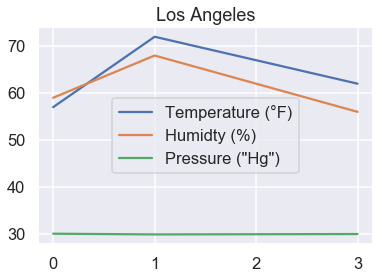

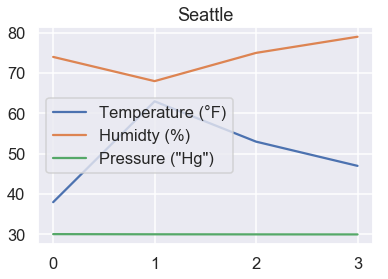

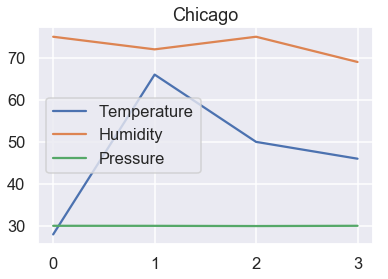

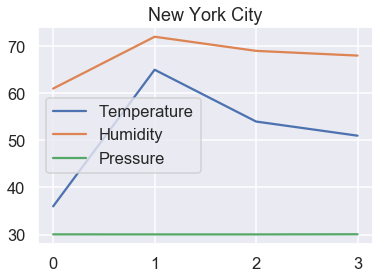

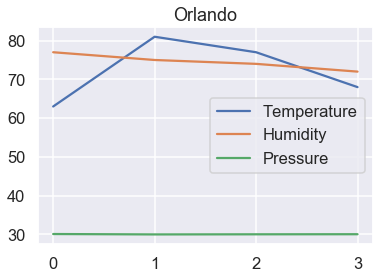

In [11]:
la_we = pd.read_csv("./WEATHERDATA/USEABLE DATA/LAX.csv")#manually adding it because did not earlier
#removing extraneous columns
la_we = la_we.drop(columns = 'Unnamed: 0')
sea_we = sea_we.drop(columns = 'Unnamed: 0')
chi_we = chi_we.drop(columns = 'Unnamed: 0')
nyc_we = nyc_we.drop(columns = 'Unnamed: 0')
orl_we = orl_we.drop(columns = 'Unnamed: 0')
chi_we = chi_we.drop(columns = 'Unnamed: 0.1')
nyc_we = nyc_we.drop(columns = 'Unnamed: 0.1')
orl_we = orl_we.drop(columns = 'Unnamed: 0.1')
#plotting lines

la_we.plot.line()
plt.title('Los Angeles')
sea_we.plot.line()
plt.title('Seattle')
chi_we.plot.line()
plt.title('Chicago')
nyc_we.plot.line()
plt.title('New York City')
orl_we.plot.line()
plt.title('Orlando')

The following are line plots of the weather conditions over time next to the flight changes over time. Despite these being discrete units of data, we chose to keep them as line plots to better show the change between months.

Los Angeles

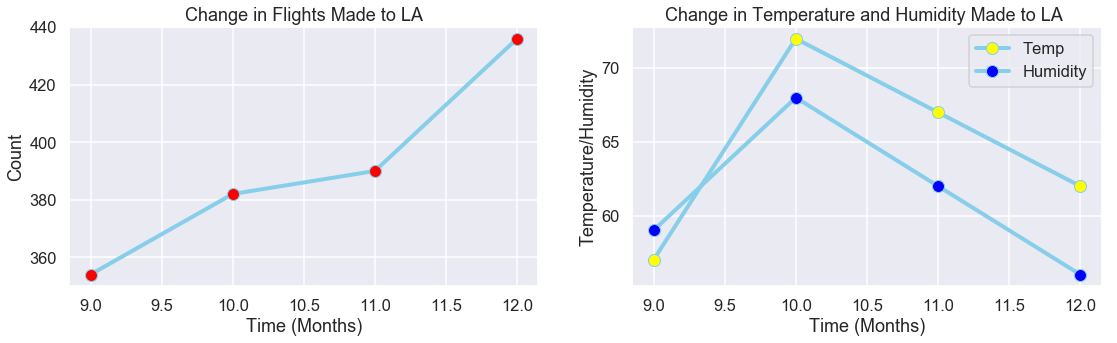

In [43]:
# multiple line plot
plt.figure()
plt.subplot(2,2,1)
plt.plot( 'Date', 'Flights', data=la_fly_freq, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.title("Change in Flights Made to LA")
plt.xlabel("Time (Months)")
plt.ylabel("Count")

plt.subplot(2,2,2)
plt.plot( 'Date', 'Temp', data=la_fly_freq, marker='o', markerfacecolor='yellow', 
         markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=la_fly_freq, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

#Add title and labels
ax.set_title("Change in Temperature and Humidity Made to LA ")
ax.set_ylabel("Temperature/Humidity")
ax.set_xlabel("Time (Months)")
plt.legend()

Seattle

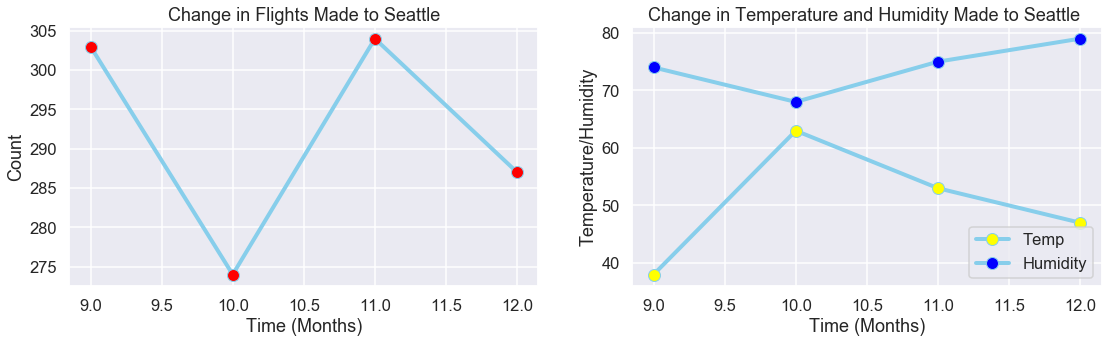

In [68]:
# multiple line plot
plt.figure()
plt.subplot(2,2,1)
plt.plot( 'Date', 'Flights', data=sea_fly_freq, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.title("Change in Flights Made to Seattle")
plt.xlabel("Time (Months)")
plt.ylabel("Count")

plt.subplot(2,2,2)
plt.plot( 'Date', 'Temp', data=sea_fly_freq, marker='o', markerfacecolor='yellow', 
         markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=sea_fly_freq, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

#Add title and labels
ax.set_title("Change in Temperature and Humidity Made to Seattle ")
ax.set_ylabel("Temperature/Humidity")
ax.set_xlabel("Time (Months)")
plt.legend()

Chicago

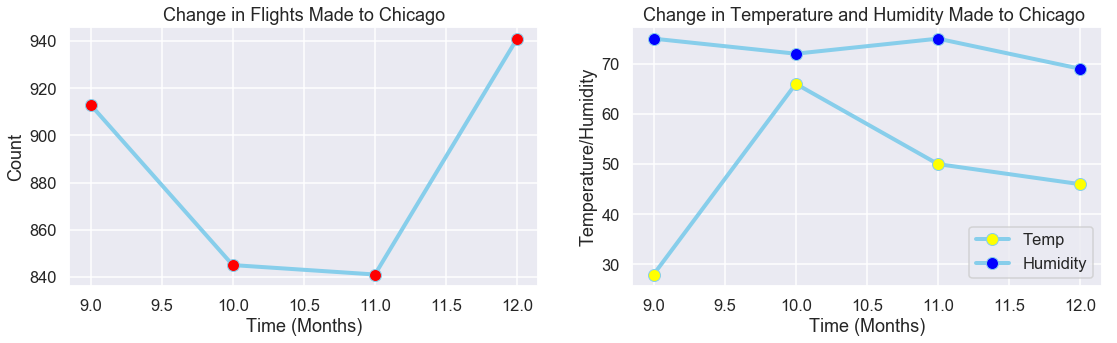

In [69]:
# multiple line plot
plt.figure()
plt.subplot(2,2,1)
plt.plot( 'Date', 'Flights', data=chi_fly_num, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.title("Change in Flights Made to Chicago")
plt.xlabel("Time (Months)")
plt.ylabel("Count")

plt.subplot(2,2,2)
plt.plot( 'Date', 'Temp', data=chi_fly_num, marker='o', markerfacecolor='yellow', 
         markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=chi_fly_num, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

#Add title and labels
ax.set_title("Change in Temperature and Humidity Made to Chicago ")
ax.set_ylabel("Temperature/Humidity")
ax.set_xlabel("Time (Months)")
plt.legend()

New York City

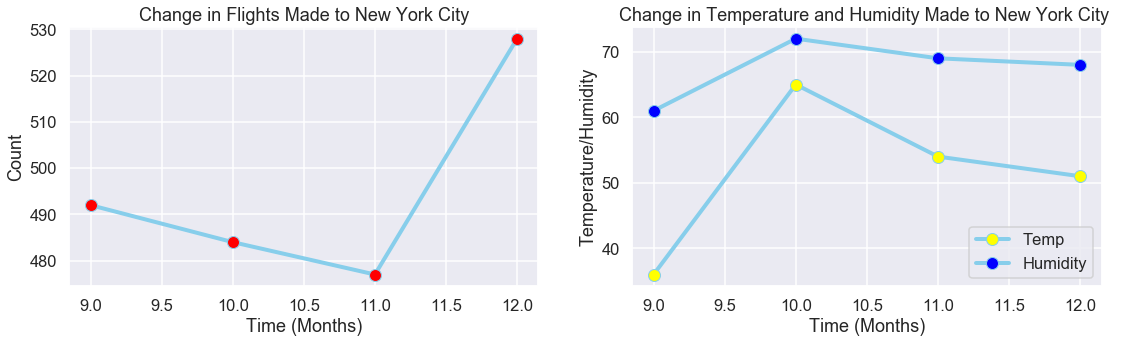

In [71]:
# multiple line plot
plt.figure()
plt.subplot(2,2,1)
plt.plot( 'Date', 'Flights', data=nyc_fly_num, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.title("Change in Flights Made to New York City")
plt.xlabel("Time (Months)")
plt.ylabel("Count")

plt.subplot(2,2,2)
plt.plot( 'Date', 'Temp', data=nyc_fly_num, marker='o', markerfacecolor='yellow', 
         markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=nyc_fly_num, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

#Add title and labels
ax.set_title("Change in Temperature and Humidity Made to New York City ")
ax.set_ylabel("Temperature/Humidity")
ax.set_xlabel("Time (Months)")
plt.legend()

Orlando

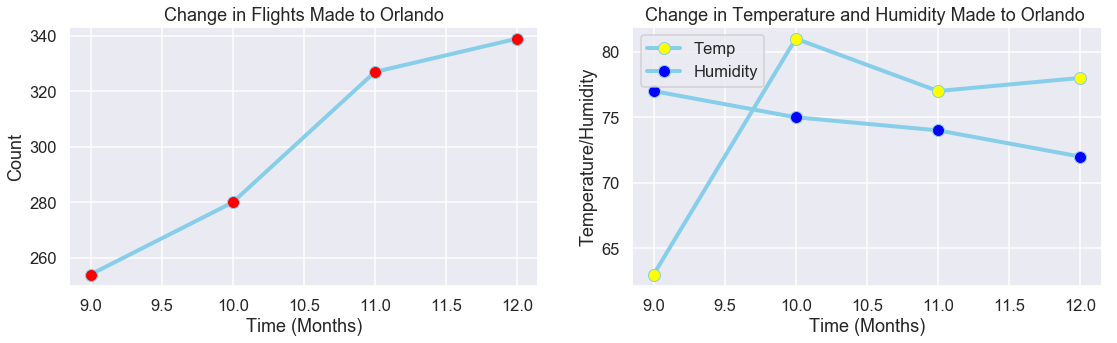

In [72]:
# multiple line plot
plt.figure()
plt.subplot(2,2,1)
plt.plot( 'Date', 'Flights', data=orl_fly_num, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.title("Change in Flights Made to Orlando")
plt.xlabel("Time (Months)")
plt.ylabel("Count")

plt.subplot(2,2,2)
plt.plot( 'Date', 'Temp', data=orl_fly_num, marker='o', markerfacecolor='yellow',
         markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Humidity', data=orl_fly_num, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)

#Add title and labels
ax.set_title("Change in Temperature and Humidity Made to Orlando ")
ax.set_ylabel("Temperature/Humidity")
ax.set_xlabel("Time (Months)")
plt.legend()

These are scatterplots for the distances traveled to each Destination City for each month. We added a small amount of jitter to the distribution so that density could be better observed. Because the number of observations we could use for weather data was so small, we could use the distances provided from the airport dataset to see what distances wer most common to travel to these cities during this time period.

Los Angeles -- looks fairly consisent across distances. Los Angeles is a very popular  tourist destination and is known for enjoyable weather.

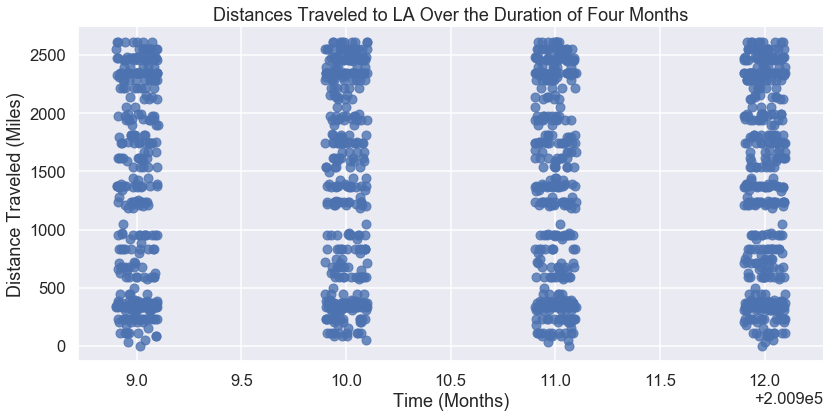

In [44]:
sns.lmplot(x='Fly_date', y='Distance', data=la_df, 
           fit_reg=False, height=6, aspect=2, x_jitter = 0.1)

#sns.set(rc={"figure.figsize":{12,8}})
ax = plt.gca()
fig = plt.gcf()
#plt.figure(figsize=(16,6))
#fig.set_size_inches(5,5)
# remove the top and right lines
#sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Distances Traveled to LA Over the Duration of Four Months')
ax.set_ylabel('Distance Traveled (Miles)')
ax.set_xlabel('Time (Months)');

Seattle -- Looks reasonably consistent across distances but a noticeable drop off in far distances. The most popular origin city was Portland, so it may be a good argument that international trips to Seattle are much less common than domestic.

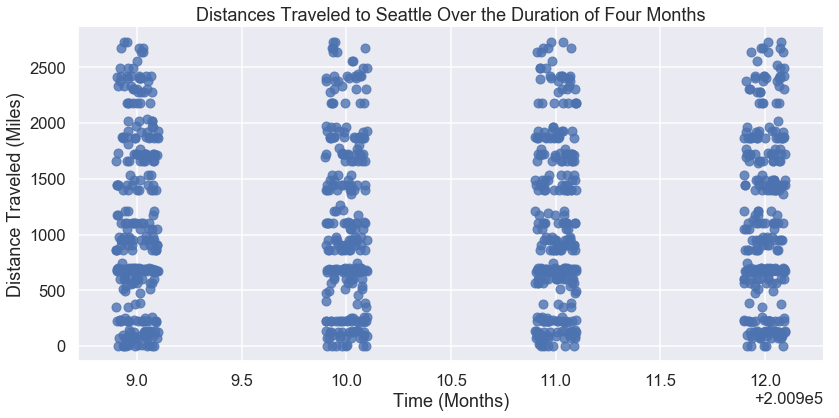

In [45]:
sns.lmplot(x='Fly_date', y='Distance', data=sea_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

# remove the top and right lines
sns.despine()

ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distances Traveled to Seattle Over the Duration of Four Months')
ax.set_ylabel('Distance Traveled (Miles)')
ax.set_xlabel('Time (Months)');

Chicago -- very noticeably, few flights were made to Chicago from far distances. A few flights from Hawaii look like outliers in the data, but flights from Anchorage made up the third highest amount of flights to Chicago.

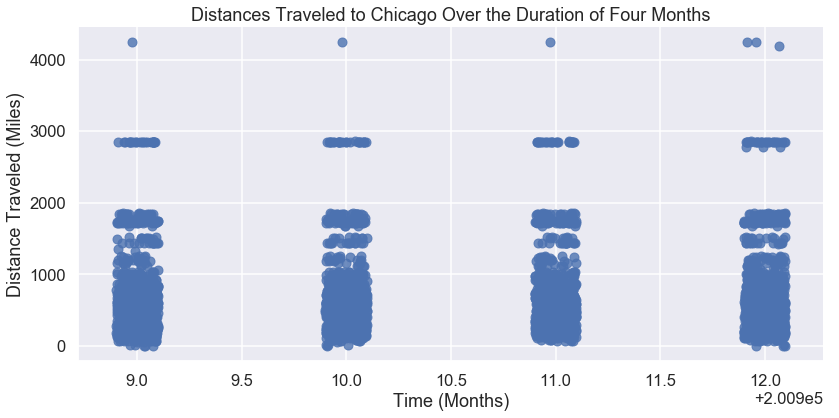

In [46]:
sns.lmplot(x='Fly_date', y='Distance', data=ch_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

# remove the top and right lines
sns.despine()

ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distances Traveled to Chicago Over the Duration of Four Months')
ax.set_ylabel('Distance Traveled (Miles)')
ax.set_xlabel('Time (Months)');

New York City -- a clear high density of domestic flights, but noticeably more international flights than Chicago. It looks like there are certain sweet spots in the higher distances that may be popular regions to leave for New York City.

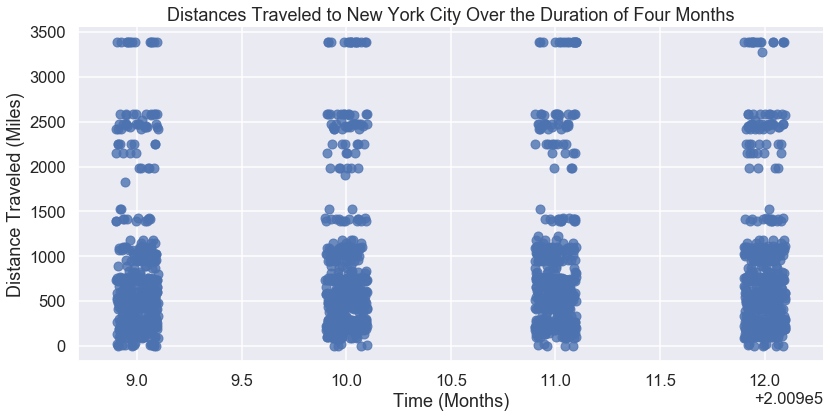

In [47]:
sns.lmplot(x='Fly_date', y='Distance', data=ny_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

# remove the top and right lines
sns.despine()

ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distances Traveled to New York City Over the Duration of Four Months')
ax.set_ylabel('Distance Traveled (Miles)')
ax.set_xlabel('Time (Months)');

Orlando -- it looks like there is a sweet spot somewhere around 500 and ~1300 miles. Orlando is a more popular destination for regional flights than cross country?

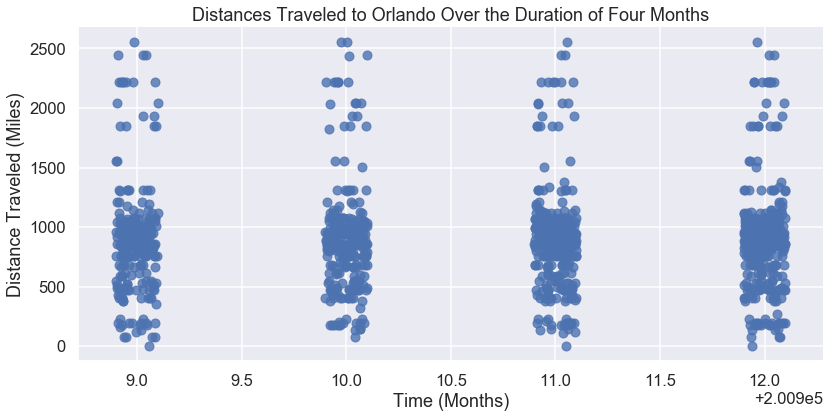

In [48]:
sns.lmplot(x='Fly_date', y='Distance', data=orl_df, 
           fit_reg=False, height=6, aspect=2,x_jitter = 0.1)

# remove the top and right lines
sns.despine()

ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distances Traveled to Orlando Over the Duration of Four Months')
ax.set_ylabel('Distance Traveled (Miles)')
ax.set_xlabel('Time (Months)');

# STATISTICAL ANALYSIS

We tested for correlations between the number of flights and weather conditions, seperately for Temperature and Humidity for each city.

Los Angeles

In [49]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', la_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.469
Method:                 Least Squares   F-statistic:                   0.04244
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.856
Time:                        19:51:04   Log-Likelihood:                -12.518
No. Observations:                   4   AIC:                             29.04
Df Residuals:                       2   BIC:                             27.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8245     51.971      1.036      0.4

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [50]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', la_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                 -0.248
Method:                 Least Squares   F-statistic:                    0.4042
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.590
Time:                        19:51:04   Log-Likelihood:                -11.268
No. Observations:                   4   AIC:                             26.54
Df Residuals:                       2   BIC:                             25.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.3542     38.020      2.245      0.1

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Seattle

In [51]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', sea_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1.911
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.301
Time:                        19:51:04   Log-Likelihood:                -13.165
No. Observations:                   4   AIC:                             30.33
Df Residuals:                       2   BIC:                             29.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    200.0546    108.469      1.844      0.2

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [52]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', sea_fly_freq)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                 -0.144
Method:                 Least Squares   F-statistic:                    0.6215
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.513
Time:                        19:51:04   Log-Likelihood:                -10.616
No. Observations:                   4   AIC:                             25.23
Df Residuals:                       2   BIC:                             24.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8208     57.360      0.502      0.6

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Chicago

In [61]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', chi_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.344
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.366
Time:                        08:42:14   Log-Likelihood:                -15.064
No. Observations:                   4   AIC:                             34.13
Df Residuals:                       2   BIC:                             32.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.1706    151.720      1.471      0.2

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [60]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', chi_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                 -0.121
Method:                 Least Squares   F-statistic:                    0.6768
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.497
Time:                        08:42:12   Log-Likelihood:                -8.7379
No. Observations:                   4   AIC:                             21.48
Df Residuals:                       2   BIC:                             20.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.3884     31.202      3.153      0.0

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


New York City

In [65]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', nyc_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.439
Method:                 Least Squares   F-statistic:                   0.08418
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.799
Time:                        08:42:41   Log-Likelihood:                -14.944
No. Observations:                   4   AIC:                             33.89
Df Residuals:                       2   BIC:                             32.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.9864    181.042      0.574      0.6

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [62]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', nyc_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.475
Method:                 Least Squares   F-statistic:                   0.03326
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.872
Time:                        08:42:21   Log-Likelihood:                -11.219
No. Observations:                   4   AIC:                             26.44
Df Residuals:                       2   BIC:                             25.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.5012     71.347      1.128      0.3

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Orlando

In [63]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', orl_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.371
Time:                        08:42:26   Log-Likelihood:                -12.418
No. Observations:                   4   AIC:                             28.84
Df Residuals:                       2   BIC:                             27.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7936     33.379      1.102      0.3

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [64]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', orl_fly_num)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 10 Jun 2019   Prob (F-statistic):             0.0519
Time:                        08:42:29   Log-Likelihood:                -3.4491
No. Observations:                   4   AIC:                             10.90
Df Residuals:                       2   BIC:                             9.671
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.3552      3.545     25.203      0.0

/Users/Robbie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


It is is important to note that due to the incredible small number of observations these extreme R-squared values are hard to take seriously. Note the Adj. R-squared values and their drastic changes in some cases.

If we aggregate the frequency flight tables into one though, will there be a more signifcant statistical analysis?

In [22]:
agg = [la_fly_freq, sea_fly_freq, chi_fly_num, nyc_fly_num, orl_fly_num ]
aggregate = pd.concat(agg)
aggregate

,Date,Flights,Temp,Humidity
0,9,354,57,59
1,10,382,72,68
2,11,390,67,62
...,...,...,...,...
1,10,280,81,75
2,11,327,77,74
3,12,339,78,72


In [23]:
outcome, predictors = patsy.dmatrices('Temp ~ Flights', aggregate)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     4.300
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0527
Time:                        19:44:59   Log-Likelihood:                -79.089
No. Observations:                  20   AIC:                             162.2
Df Residuals:                      18   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8930      7.023     10.094      0.0

In [24]:
outcome, predictors = patsy.dmatrices('Humidity ~ Flights', aggregate)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.008127
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.929
Time:                        19:45:01   Log-Likelihood:                -64.618
No. Observations:                  20   AIC:                             133.2
Df Residuals:                      18   BIC:                             135.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7218      3.406     20.468      0.0

With this aggregate of the five cities, we gain 5x the observations and see a 0.193 R-squared value for Temperature and Flights, but 0 for Humidity and Flights.

The limited duration of months available to use has certainly made a strong analysis difficult. 
What we can argue with these results, however, is that Humidity likely did not have any influence on the rise or fall of flights to Los Angeles, Seattle, Chicago, New York City, or Orlando made in the time period of September 2009 to December 2009. 
Likewise, there is quite small significant evidence across these five cities and time period that Temperature may have made a small influence on the number of flights made.

# Ethics & Privacy

All the data is publically available. The datasets regarding air and passenger traffic has anonymized the data and removed any personally identifying information.  However, our study reflects trends that can influence plane ticket purchases.  A possible unintended consequence of our work is that travelers may be able to see what months have lower/higher traffic in number of flights to a certain destination, and this could affect their plans in terms of when to go.  For example, seeing a decrease in traffic to a city one passenger could infer lower hotel rates due to lower demand or low amount of travelers.  Due to the change of plans, this could have an economic impact in the area for any local business hoping to attract travelers (rental car service, restaurants, tourist activities, etc.)  There could also be unintentional harm that affects the traveler’s experience, for there would be a tradeoff between pleasing travel weather or conditions of less traffic (less busy areas, waiting in lines, parking etc.)


Possible biases in our data come from our team’s perception of “popular, major” cities based on our pre-existing knowledge.  However, these places are not completely representative of major cities throughout the U.S. (variety in climate, compactness, landmarks to visit).

The data is limited so it should not influence people’s travelling decision that much. The data for flights only provide the month and year. As we are limited to the month and the year instead of the exact date, it decreases the accuracy of the analysis by reducing the data of changes we can use. In this case, based on the result of our analysis, we can see that there was overall a small correlation and should not be too significantly used by these parties (airlines, tourist agencies, customers, etc.) because of the risk if our data were to be taken as fact.

Our issue with webscraping also posed an ethical situation we were not prepared to solve. When attempting to webscrape data from a website, access may sometimes be restricted intentionally and doing so should be respected to the upmost respect of the law and website's direction.

# Conclusion & Discussion

In conclusion, the result does not match with our hypothesis. Perhaps it would be more accurate that our hypothesis could not be significantly confirmed nor denied. A heavy factor was the inability to get a more significant number of observations. We did not realize the ethical dilemmas that can arise when webscraping and using information available on the web. We did not realize that descriptions for datasets online were not always accurate and that information in them was not clear or specified to what ranges they include. 

We hypothesized that as the weather gets more unfriendly, which we operationalized as when the temperature, humidity, or air pressure make significant increasese or decreases, the number of flights will accomodate accordingly. However, the results of analysis show, even with limited data, that there is little to no correlation between these variables.

For the future, it is clear that more observations, including weather factors, flight information, and a much longer range of dates are necessary to make a more significant claim about weather conditions affecting travel. Further visualizations may be better described with scatterplots using higher number of observations as well as a geospatial analysis demonstrating weather conditions across the country. 

Should this data become more comprehensive and confirming toward our hypothesis, tourism industries and airlines may find such predictive analytics useful in measuring demand and supply. Additionally, budget-friendly customers may find that buying at times of less popular travel reward them with cheaper airfare.

Other factors, as well, would need to be considered in the travel decision making process. Holidays, natural disasters, political events, economic shifts, and even more likely factor into these events. It is the nature of data science, however, that we can only make as good of a claim as the data we can work with allows.